In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
import os
import pandas as pd
import anndata as ad
import seaborn as sns
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariateConditional,EstimatorSettings

In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code/WT_KO_mutant_thymus'

In [46]:
adata = sc.read("/notebook/External/Archive/Joe/processed_data/M_cell/h5ad_files/combined_WT_KO_mutant_mTECs_3000_HVGs.h5ad")

# UMAPs

## Cell types

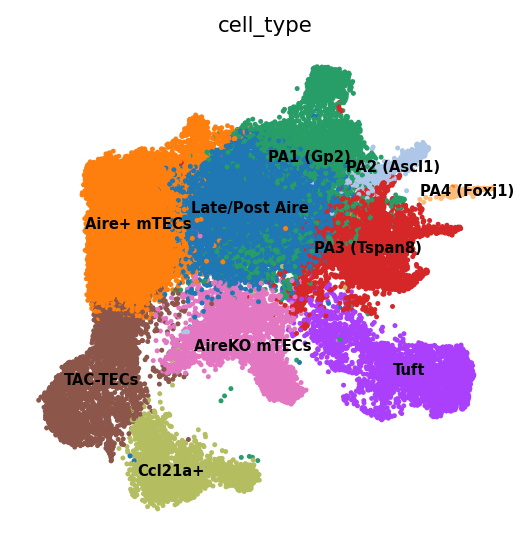

In [48]:
sc.pl.umap(
    adata,
    color="cell_type",
    s=20,
    legend_loc="on data",
    legend_fontsize="x-small",
)

## Genotypes

In [49]:
adata.obs.genotype.value_counts()

WT        12414
AireKO     9560
CY         8039
GW         5584
Name: genotype, dtype: int64

In [50]:
subsetAdata = {}
for genotype in adata.obs.genotype.unique():
    subsetAdata[genotype] = adata[adata.obs.genotype == genotype].copy()
    sc.pp.subsample(subsetAdata[genotype], n_obs=adata.obs.genotype.value_counts().min())
subsetAdata = ad.concat(subsetAdata)

In [51]:
subsetAdata.obs.genotype.value_counts()

WT        5584
AireKO    5584
GW        5584
CY        5584
Name: genotype, dtype: int64

/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


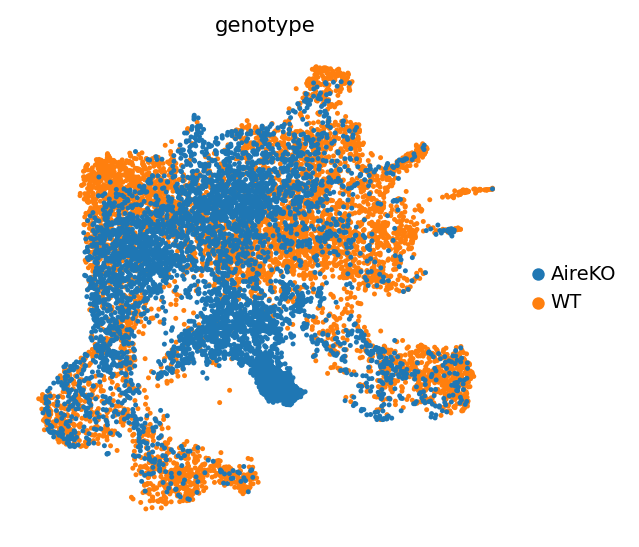

In [52]:
sc.pl.umap(
    subsetAdata[subsetAdata.obs.genotype.isin(["WT", "AireKO"])],
    color="genotype",
    s=20,
)

/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


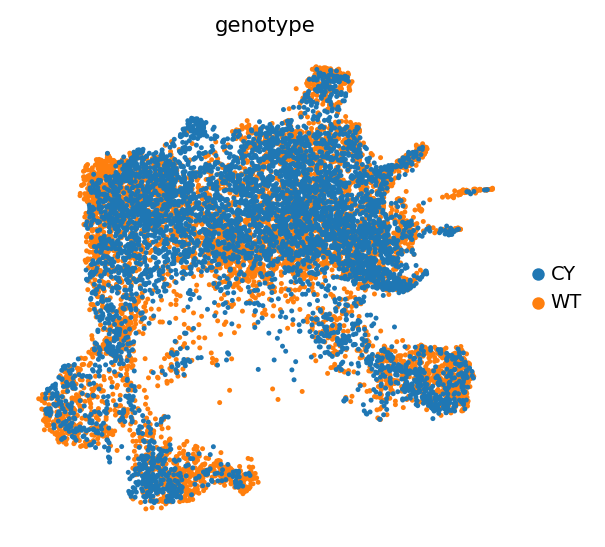

In [53]:
sc.pl.umap(
    subsetAdata[subsetAdata.obs.genotype.isin(["WT", "CY"])],
    color="genotype",
    s=20,
)

/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


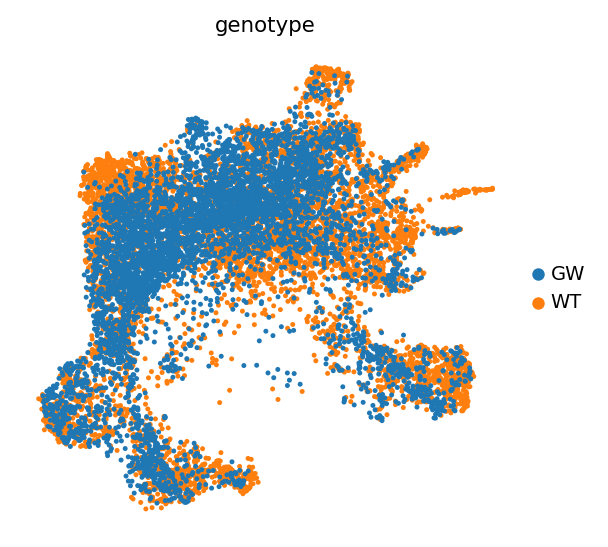

In [54]:
sc.pl.umap(
    subsetAdata[subsetAdata.obs.genotype.isin(["WT", "GW"])],
    color="genotype",
    s=20,
)

# Abundance of clusters

## AireKO vs WT

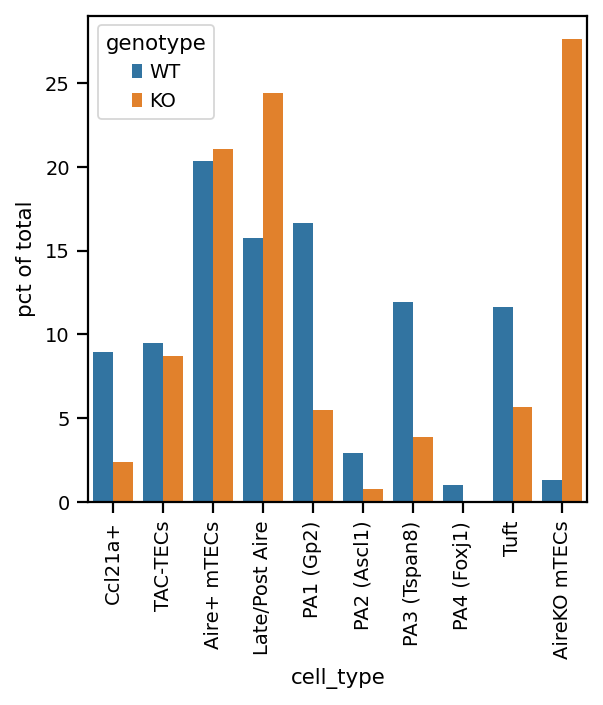

In [55]:
koData = subsetAdata[subsetAdata.obs.genotype == "AireKO"]
wtData = subsetAdata[subsetAdata.obs.genotype == "WT"]
abundances = pd.DataFrame()
for cellType in adata.obs.cell_type.unique():
    fracKO = len(koData[koData.obs.cell_type == cellType])/len(koData)*100
    fracWT = len(wtData[wtData.obs.cell_type == cellType])/len(wtData)*100
    data=pd.DataFrame([[fracWT, "WT", cellType], [fracKO, "KO", cellType]], columns=["pct of total", "genotype", "cell_type"])
    abundances = pd.concat([abundances, data])
abundances.cell_type = abundances.cell_type.astype("category")
abundances.cell_type.cat.reorder_categories(["Ccl21a+", "TAC-TECs", "Aire+ mTECs", "Late/Post Aire", "PA1 (Gp2)", "PA2 (Ascl1)", "PA3 (Tspan8)", "PA4 (Foxj1)", "Tuft", "AireKO mTECs"], inplace=True)
sns.barplot(
    data=abundances,
    x="cell_type",
    y="pct of total",
    hue="genotype",
)
plt.xticks(rotation = 90)
plt.show()

## CY vs WT

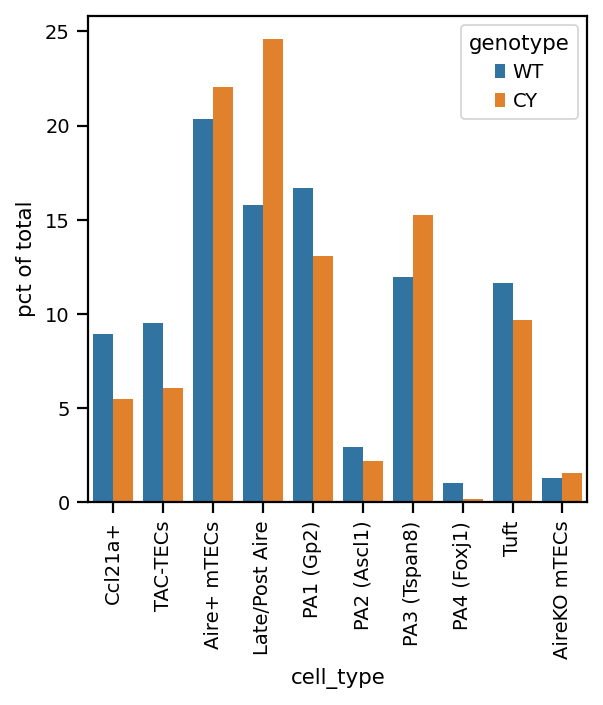

In [56]:
cyData = subsetAdata[subsetAdata.obs.genotype == "CY"]
wtData = subsetAdata[subsetAdata.obs.genotype == "WT"]
abundances = pd.DataFrame()
for cellType in adata.obs.cell_type.unique():
    fracCY = len(cyData[cyData.obs.cell_type == cellType])/len(cyData)*100
    fracWT = len(wtData[wtData.obs.cell_type == cellType])/len(wtData)*100
    data=pd.DataFrame([[fracWT, "WT", cellType], [fracCY, "CY", cellType]], columns=["pct of total", "genotype", "cell_type"])
    abundances = pd.concat([abundances, data])
abundances.cell_type = abundances.cell_type.astype("category")
abundances.cell_type.cat.reorder_categories(["Ccl21a+", "TAC-TECs", "Aire+ mTECs", "Late/Post Aire", "PA1 (Gp2)", "PA2 (Ascl1)", "PA3 (Tspan8)", "PA4 (Foxj1)", "Tuft", "AireKO mTECs"], inplace=True)
sns.barplot(
    data=abundances,
    x="cell_type",
    y="pct of total",
    hue="genotype",
)
plt.xticks(rotation = 90)
plt.show()

## GW vs WT

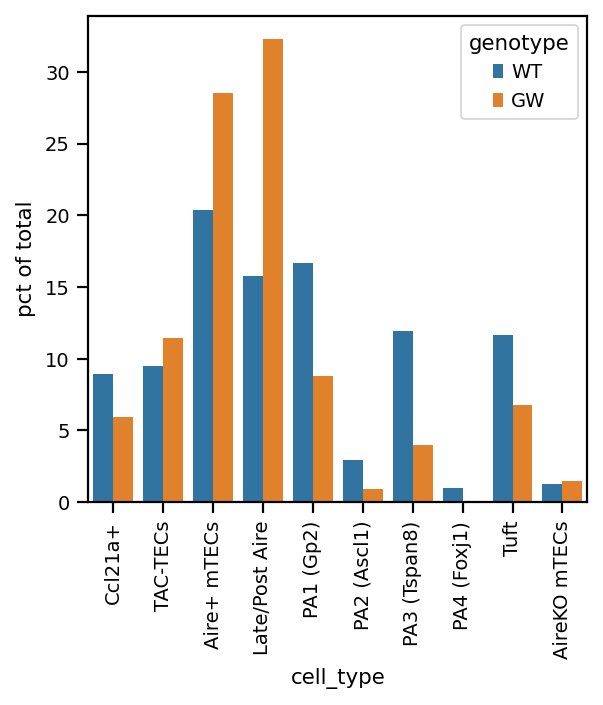

In [57]:
gwData = subsetAdata[subsetAdata.obs.genotype == "GW"]
wtData = subsetAdata[subsetAdata.obs.genotype == "WT"]
abundances = pd.DataFrame()
for cellType in adata.obs.cell_type.unique():
    fracGW = len(gwData[gwData.obs.cell_type == cellType])/len(gwData)*100
    fracWT = len(wtData[wtData.obs.cell_type == cellType])/len(wtData)*100
    data=pd.DataFrame([[fracWT, "WT", cellType], [fracGW, "GW", cellType]], columns=["pct of total", "genotype", "cell_type"])
    abundances = pd.concat([abundances, data])
abundances.cell_type = abundances.cell_type.astype("category")
abundances.cell_type.cat.reorder_categories(["Ccl21a+", "TAC-TECs", "Aire+ mTECs", "Late/Post Aire", "PA1 (Gp2)", "PA2 (Ascl1)", "PA3 (Tspan8)", "PA4 (Foxj1)", "Tuft", "AireKO mTECs"], inplace=True)
sns.barplot(
    data=abundances,
    x="cell_type",
    y="pct of total",
    hue="genotype",
)
plt.xticks(rotation = 90)
plt.show()

# Differential Density

In [58]:
def log_density_ratio(
        adata,
        group_by,
        groups,
        latent_rep="X_umap",
        key_added="log_density_ratio",
        est_settings=None,
):
    if group_by not in adata.obs:
        raise ValueError(f"{group_by} is not a valid column key in 'adata.obs'")
    for group in groups:
        if group not in adata.obs[group_by].unique():
            raise ValueError(
                f"{group} is not a valid category of 'adata.obs.{group_by}' ({adata.obs[group_by].unique()})"
            )
    density = KDEMultivariateConditional(
        endog=adata.obsm[latent_rep],
        exog=np.array(adata.obs[group_by].values == groups[1]),
        dep_type="cc",
        indep_type="u",
        bw="normal_reference",
        defaults=est_settings
    )
    print(f"Calculating log density ratio of {groups[1]}/{groups[0]}")
    z1 = density.pdf(adata.obsm["X_umap"], 0 + np.zeros((adata.obsm["X_umap"].shape[0], 1)))
    z2 = density.pdf(adata.obsm["X_umap"], 1 + np.zeros((adata.obsm["X_umap"].shape[0], 1)))
    adata.obs[key_added] = np.log(z2/z1)  # group2 vs group1
    return adata

## WT vs KO

In [61]:
densityAdata = log_density_ratio(
    subsetAdata[subsetAdata.obs.cell_type != "AireKO mTECs"],
    group_by="genotype",
    groups=("WT", "AireKO"),
    key_added = "KO/WT_genotype_density",
)

Calculating log density ratio of AireKO/WT


/tmp/ipykernel_4250/3697302809.py:27: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = np.log(z2/z1)  # group2 vs group1


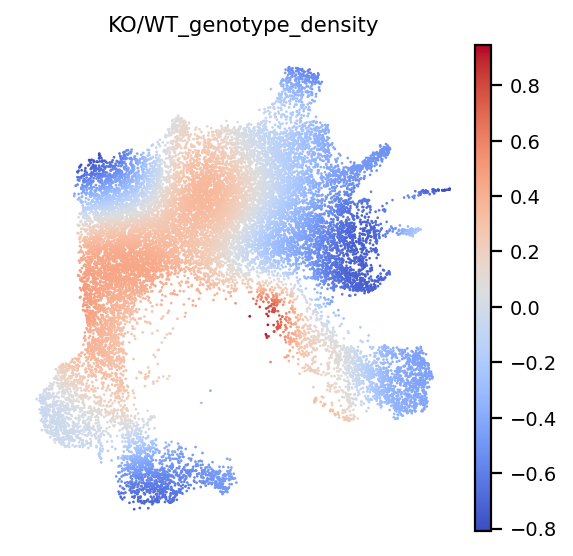

In [62]:
sc.pl.umap(
    densityAdata,
    color="KO/WT_genotype_density",
    cmap="coolwarm",
)

## WT vs CY

In [63]:
densityAdata = log_density_ratio(
    subsetAdata,
    group_by="genotype",
    groups=("WT", "CY"),
    key_added = "CY/WT_genotype_density",
)

Calculating log density ratio of CY/WT


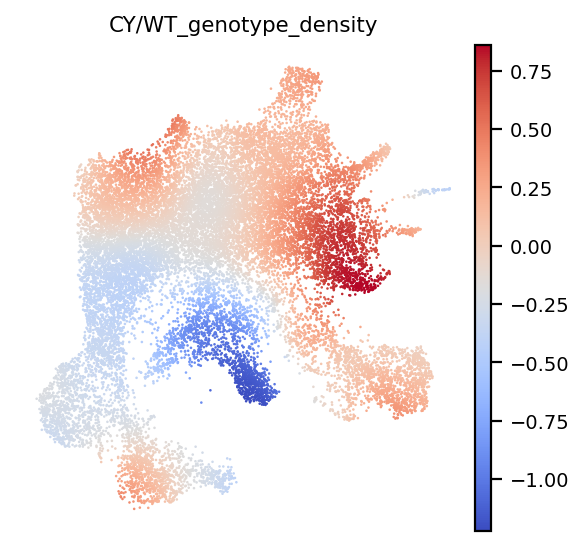

In [64]:
sc.pl.umap(
    subsetAdata,
    color="CY/WT_genotype_density",
    cmap="coolwarm",
)

## WT vs GW

In [65]:
densityAdata = log_density_ratio(
    subsetAdata,
    group_by="genotype",
    groups=("WT", "GW"),
    key_added = "GW/WT_genotype_density",
)

Calculating log density ratio of GW/WT


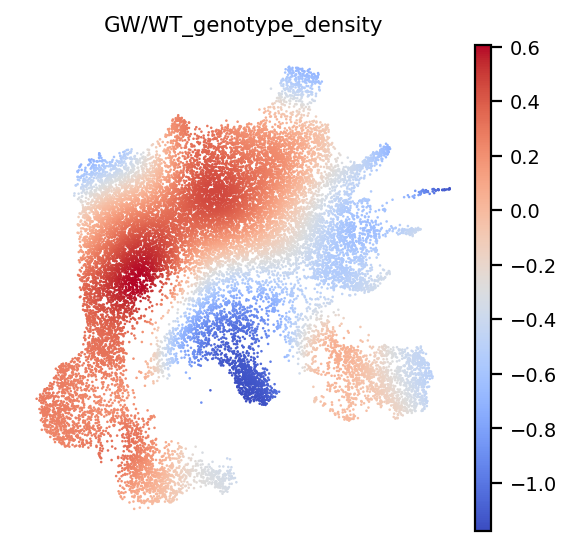

In [66]:
sc.pl.umap(
    subsetAdata,
    color="GW/WT_genotype_density",
    cmap="coolwarm",
)